# Neural Network

**Bài toán:** Xây dựng model neural network cơ bản để dự đoán về số tình trạng sống/chết của những người trên tàu titanic năm 1912. Ta sẽ dùng thư viện tensorflow để xây dựng model.

## 1. Import thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## 2. Khám phá dữ liệu

**Đọc dữ liệu:**

In [2]:
df=pd.read_csv("train.csv")
df=df[df['Age'].isnull()==False]

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Giải thích dữ liệu:**

- PassengerID: ID hành khách
- Survived: Khách hàng còn sống hay không(1: Có,0: Không)
- Pclass: Hạng vé
- Name: Tên
- Sex: Giới tính
- Age: Tuổi
- SibSp: Số lượng anh chị em hoặc vợ chồng trên tàu
- Parch: Số lượng ba mẹ hoặc trẻ em trên tàu
- Ticket: Số hiệu vé
- Fare: Giá vé
- Cabin: Số hiệu cabin
- Embarked: Cảng lên tàu (C = Cherbourg, Q = Queenstown, S = Southampton)

Ở jupyter notebook này, tôi sẽ chỉ lấy 4 features bao gồm: ['Pclass','Sex','Age','Fare'] và nhãn y là Survied.

In [4]:
df=df[['Pclass','Sex','Age','Fare','Survived']]
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [5]:
# Mapping {'female','male'} -> {0,1}.
sex_mapping = {'female': 1, 'male': 0}
df['Sex'] = df['Sex'].map(sex_mapping)

**Hình dáng dữ liệu:**

In [6]:
df.shape

(714, 5)

**Thông tin dữ liệu:**

In [7]:
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    714 non-null    int64  
 1   Sex       714 non-null    int64  
 2   Age       714 non-null    float64
 3   Fare      714 non-null    float64
 4   Survived  714 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 33.5 KB


**Mô tả dữ liệu:**

In [8]:
df.describe()

,Pclass,Sex,Age,Fare,Survived
count,714.000000,714.000000,714.000000,714.000000,714.000000
mean,2.236695,0.365546,29.699118,34.694514,0.406162
std,0.838250,0.481921,14.526497,52.918930,0.491460
min,1.000000,0.000000,0.420000,0.000000,0.000000
25%,1.000000,0.000000,20.125000,8.050000,0.000000
50%,2.000000,0.000000,28.000000,15.741700,0.000000
75%,3.000000,1.000000,38.000000,33.375000,1.000000
max,3.000000,1.000000,80.000000,512.329200,1.000000


**Biểu đồ cột giữa Sex và Survied:**

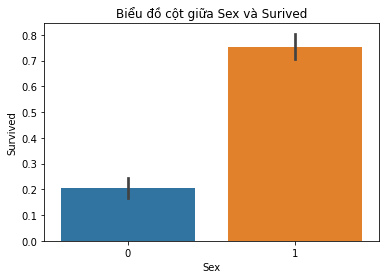

In [9]:
sns.barplot(data=df,y='Survived',x='Sex');
plt.title('Biểu đồ cột giữa Sex và Surived');

Ta có thể dễ dạng nhận thấy phụ nữ có tỉ lệ sống sót cao hơn.

Số liệu thống kê cụ thể về tỉ lệ Survived theo Sex:

In [10]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
1,1,0.754789
0,0,0.205298


**Biểu đồ cột về Pclass và Survied:**

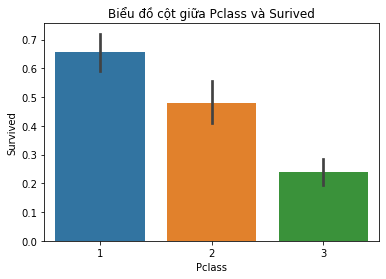

In [11]:
sns.barplot(data=df,y='Survived',x='Pclass');
plt.title('Biểu đồ cột giữa Pclass và Surived');

Từ đồ thị trên ta thấy Tỷ lệ người ở sống ở Pclass 1 là cao nhất, giảm dần xuống Pclass 2 và 3.

Số liệu thống kê cụ thể về tỉ lệ Survived theo Pclass

In [12]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.655914
1,2,0.479769
2,3,0.239437


**Biểu đồ cột về Age và Survived:**

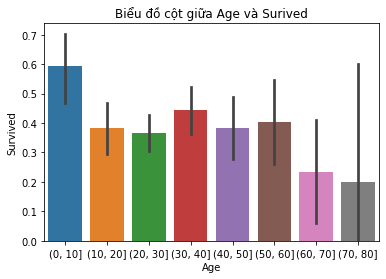

In [13]:
age_bins = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
sns.barplot(x=age_bins, y='Survived', data=df)
plt.title('Biểu đồ cột giữa Age và Surived');

**Trực quan lên toàn bộ dữ liệu**

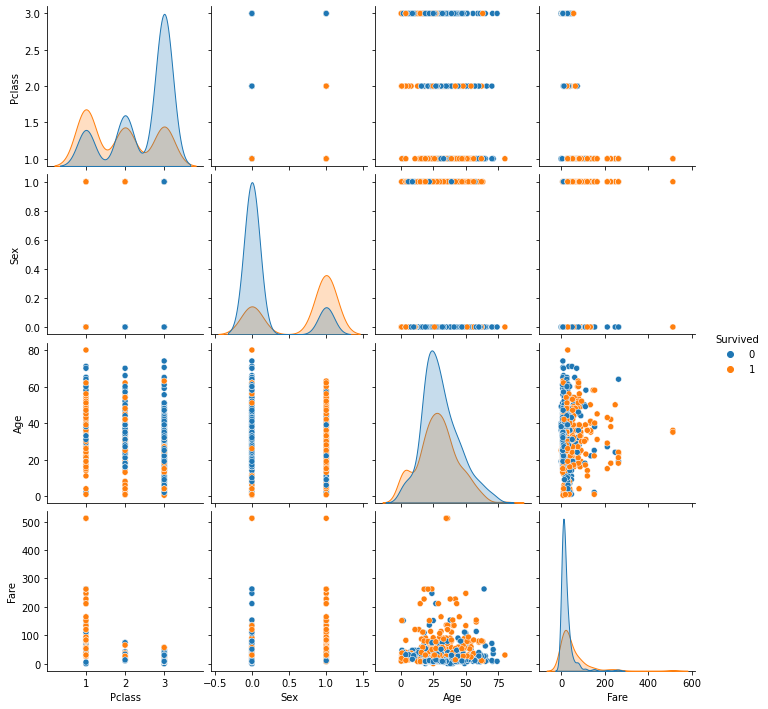

In [14]:
sns.pairplot(data=df,hue='Survived');

**Kiểm tra độ tương quan giữa các cột bằng bản đồ nhiệt**

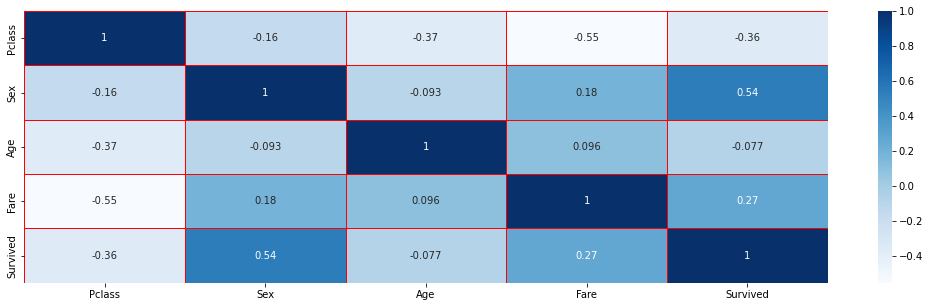

In [15]:
plt.figure(figsize=(18,5))
sns.heatmap(df.corr(), annot=True, lw = 1, linecolor="r",cmap="Blues");

## 3. Trainning and testing data.

**Tách tập df thành X, y**

In [16]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

**Sử dụng model_selection.train_test_split từ sklearn để chia dữ liệu thành các tập huấn luyện và thử nghiệm**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [20]:
a1=X_train.values.reshape(-1,4)
a2=y_train.values.reshape(-1,1)

**Xây dựng model**

Tôi sẽ xây dựng model có 4 lớp.
- Layer 1: 64 units, activation: relu.
- Layer 2: 32 units, activation: relu.
- Layer 3: 8 units, activation: relu.
- Layer 4: 1 units, activation: sigmoid.

In [37]:
model=Sequential([
    Dense(units=64,activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=8,activation='relu'),
    Dense(units=1,activation='sigmoid'),
])

In [38]:
from tensorflow.keras.losses import BinaryCrossentropy

In [41]:
model.compile(loss=BinaryCrossentropy(),metrics=['accuracy'],optimizer='adam')

In [42]:
#epochs: number of steps in gradient descent
model.fit(a1,a2,epochs=200,validation_split=0.2)

Epoch 1/200
15/15 [==============================] - 0s 7ms/step - loss: 1.4911 - accuracy: 0.8026 - val_loss: 1.1228 - val_accuracy: 0.7826
Epoch 2/200
15/15 [==============================] - 0s 3ms/step - loss: 1.0659 - accuracy: 0.7873 - val_loss: 0.7508 - val_accuracy: 0.7826
Epoch 3/200
15/15 [==============================] - 0s 1ms/step - loss: 0.7765 - accuracy: 0.8092 - val_loss: 0.6066 - val_accuracy: 0.7826
Epoch 4/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5895 - accuracy: 0.8158 - val_loss: 0.5654 - val_accuracy: 0.8000
Epoch 5/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5136 - accuracy: 0.7763 - val_loss: 0.5194 - val_accuracy: 0.7913
Epoch 6/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4792 - accuracy: 0.8048 - val_loss: 0.5064 - val_accuracy: 0.8000
Epoch 7/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4634 - accuracy: 0.8026 - val_loss: 0.4994 - val_accuracy: 0.7913
Epoch 8/200
1

Epoch 59/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4105 - accuracy: 0.8158 - val_loss: 0.4450 - val_accuracy: 0.7826
Epoch 60/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4090 - accuracy: 0.8070 - val_loss: 0.4337 - val_accuracy: 0.7739
Epoch 61/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4139 - accuracy: 0.8114 - val_loss: 0.4354 - val_accuracy: 0.7739
Epoch 62/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4130 - accuracy: 0.8180 - val_loss: 0.4443 - val_accuracy: 0.7826
Epoch 63/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4116 - accuracy: 0.8180 - val_loss: 0.4441 - val_accuracy: 0.7826
Epoch 64/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.7939 - val_loss: 0.4327 - val_accuracy: 0.7739
Epoch 65/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4177 - accuracy: 0.8180 - val_loss: 0.4371 - val_accuracy: 0.7826
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 0.4040 - accuracy: 0.8136 - val_loss: 0.4437 - val_accuracy: 0.7739
Epoch 117/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8048 - val_loss: 0.4411 - val_accuracy: 0.7739
Epoch 118/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4058 - accuracy: 0.8136 - val_loss: 0.4488 - val_accuracy: 0.7826
Epoch 119/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8136 - val_loss: 0.4426 - val_accuracy: 0.7652
Epoch 120/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4045 - accuracy: 0.8092 - val_loss: 0.4325 - val_accuracy: 0.7652
Epoch 121/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4198 - accuracy: 0.8114 - val_loss: 0.4420 - val_accuracy: 0.7826
Epoch 122/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4089 - accuracy: 0.8158 - val_loss: 0.4482 - val_accuracy: 0.7739
Epoch 123/200

15/15 [==============================] - 0s 2ms/step - loss: 0.3908 - accuracy: 0.8268 - val_loss: 0.4543 - val_accuracy: 0.7826
Epoch 174/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3927 - accuracy: 0.8311 - val_loss: 0.4514 - val_accuracy: 0.7826
Epoch 175/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3945 - accuracy: 0.8224 - val_loss: 0.4539 - val_accuracy: 0.7739
Epoch 176/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3919 - accuracy: 0.8355 - val_loss: 0.4625 - val_accuracy: 0.7739
Epoch 177/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3911 - accuracy: 0.8246 - val_loss: 0.4352 - val_accuracy: 0.7913
Epoch 178/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3973 - accuracy: 0.8268 - val_loss: 0.4507 - val_accuracy: 0.7913
Epoch 179/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4123 - accuracy: 0.8224 - val_loss: 0.4571 - val_accuracy: 0.7913
Epoch 180/200

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 2,673
Trainable params: 2,673
Non-trainable params: 0
_________________________________________________________________


## Predict

In [43]:
a3=X_test.values.reshape(-1,4)
a4=y_test.values.reshape(-1,1)

In [44]:
temp=model.predict(a3)
y_pred=np.zeros_like(temp)
y_pred[temp>=0.5]=1

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
acc = accuracy_score(a4, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8041958041958042
